In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sns
from sympy import *
from sklearn.neighbors.kde import KernelDensity
import numpy.random
np.random.RandomState(10)

RandomState(MT19937) at 0x7F559AF56990

## Questão 9

Mude as classes para:

C1 -> gaussiana bidimensional com média [0 0] e matriz de covariância [1 -0.5; -0.5 1]

C2 -> gaussiana bidimensional com média [3 3] e atriz de covariância [1 -0.5; -0.5 1]

Refaça todos os casos acima estudados para esta nova configuração das classes.

**9.1:**

O cálculo da função discriminante é feita de maneira similar ao desenvolvido na questão 1:

$$P(x/\omega_{1}) - P(x/\omega_{2}) = 0$$

Desse modo, fazendo as substituições necessárias:

$$x_{1}^{2} - x_{1}x_{2} + x_{2}^{2} - x_{1}^{2} -  x_{2}^{2} + x_{1}x_{2} - 3x_{1} - 3x_{2} + 9= 0$$

Desse modo, a função discriminante será:

$$-3x_{1} - 3x_{2} + 9 = 0$$

In [ ]:
# Gerando a primeira variável
mean_0  = (0, 0)
cov_0   = [[1, -0.5], [-0.5, 1]]
Trein0 = np.random.multivariate_normal(mean_0, cov_0, 1000).T # conjunto C1 de treinamento
Teste0 = np.random.multivariate_normal(mean_0, cov_0, 1000).T # conjunto C1 de teste

# Gerando a segunda variável
mean_1 = (3, 3)
cov_1  = [[1, -0.5], [-0.5, 1]]
Trein1 = np.random.multivariate_normal(mean_1, cov_1, 1000).T # conjunto C2 de treinamento
Teste1 = np.random.multivariate_normal(mean_1, cov_1, 1000).T # conjunto C2 de teste

# Função discriminante

In [ ]:
def func_dis(mean,cov):
  x1 = symbols('x1')
  x2 = symbols('x2')

  m_x = np.array([x1 - mean[0],x2-mean[1]])
  c   = -(len(mean)/2)*(np.log(2*np.pi)) -(0.5)*np.log(np.linalg.det(np.abs(cov)))
  g = np.array(-0.5*m_x.T*np.linalg.inv(cov_1)*m_x).sum(axis  =1).sum() + c
  return g 

In [ ]:
g1 = func_dis(mean_0,cov_0)
g2 = func_dis(mean_1,cov_1)
f = g1-g2
f = simplify(f)

In [ ]:
f = g1-g2
f = simplify(f)
f

-1.11022302462516e-16*x1**2 - 6.0*x1 - 1.11022302462516e-16*x2**2 - 6.0*x2 + 18.0

In [ ]:
x1 = np.linspace(-4,9,1000)
x2 = -x1 + 3

# Erro

In [ ]:
# verificando se alguma amostra passou do limiar calculado x1 + x2 < 4
e1 = 100*np.sum(np.array([Trein0[0] + Trein0[1]]) >3)/[2000]  # erro estimado da classe 1
e2 = 100*np.sum(np.array([Trein1[0] + Trein1[1]]) <3)/[2000]  # erro estimado da classe 2
erro = (e1 + e2)
erro

array([0.05])

# Região de separação

Text(0, 0.5, '$X_{2}$ ')

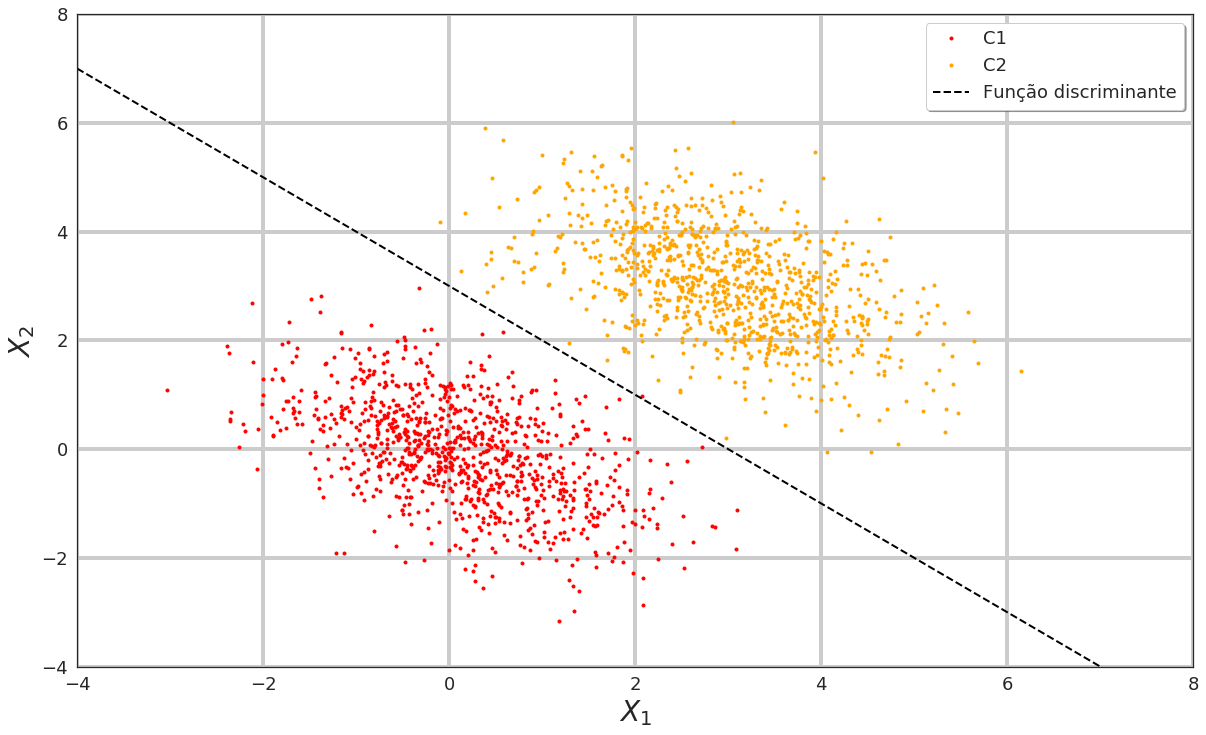

In [ ]:
plt.figure(figsize = [20, 12])
#sns.set()
plt.plot(Trein0[0],Trein0[1], '.',color ='Red',label = 'C1' )
plt.plot(Trein1[0],Trein1[1],'.',color = 'orange',label = 'C2' )
plt.plot(x1,x2,'--',color = 'black',label ='Função discriminante',linewidth=2)
plt.ylim(-4,8)
plt.xlim(-4,8)
plt.legend(loc='upper right', shadow=True,prop={'size': 18})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## 9.2  (6)

# Estimando as médias

In [ ]:
Media_C1 = [np.mean(Trein0[0]),np.mean(Trein0[1])]
Media_C2 = [np.mean(Trein1[0]),np.mean(Trein1[1])]

# Reta que liga as medias

In [ ]:
#y  = ax + b 
a  = (Media_C2[1] - Media_C1[1])/(Media_C2[0] - Media_C1[0])
b  = Media_C1[1] - Media_C1[0]*a

In [ ]:
x_vet = np.linspace(Media_C1[0],Media_C2[0],100) 
y       = a*x_vet + b

Text(0, 0.5, '$X_{2}$ ')

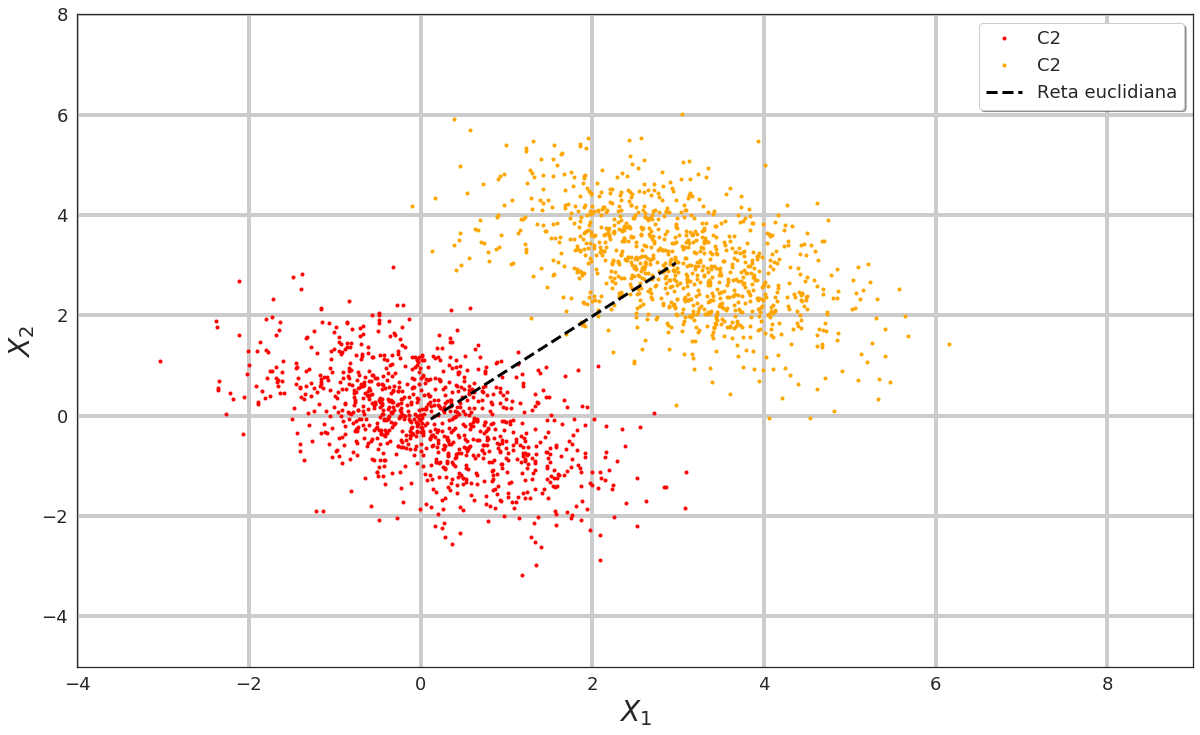

In [ ]:

plt.figure(figsize = [20, 12])
plt.plot(Trein0[0],Trein0[1], '.',color ='Red',label = 'C2' )
plt.plot(Trein1[0],Trein1[1],'.',color = 'orange',label = 'C2' )
plt.plot(x_vet,y,'--',color = 'black',label ='Reta euclidiana',linewidth=3)
plt.ylim(-5,8)
plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 18})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

# Reta perpendicular 

In [ ]:
m1 = np.arctan(a) #Coêficiente angular da reta que liga as médias da classe
d  = np.array(Media_C2) - np.array(Media_C1)
d  = np.sqrt(d[1]**2   + d[0]**2)/2 # hipotenusa do retangulo 
ys = np.cos(m1)*d - Media_C1[1] 
xs = np.sin(m1)*d - Media_C1[0]

In [ ]:
a_fd = -1/a
b_fd = ys - a_fd*xs 

In [ ]:
y_perd = a_fd*x1 + b_fd # equação da reta discriminante 

Text(0, 0.5, '$X_{2}$ ')

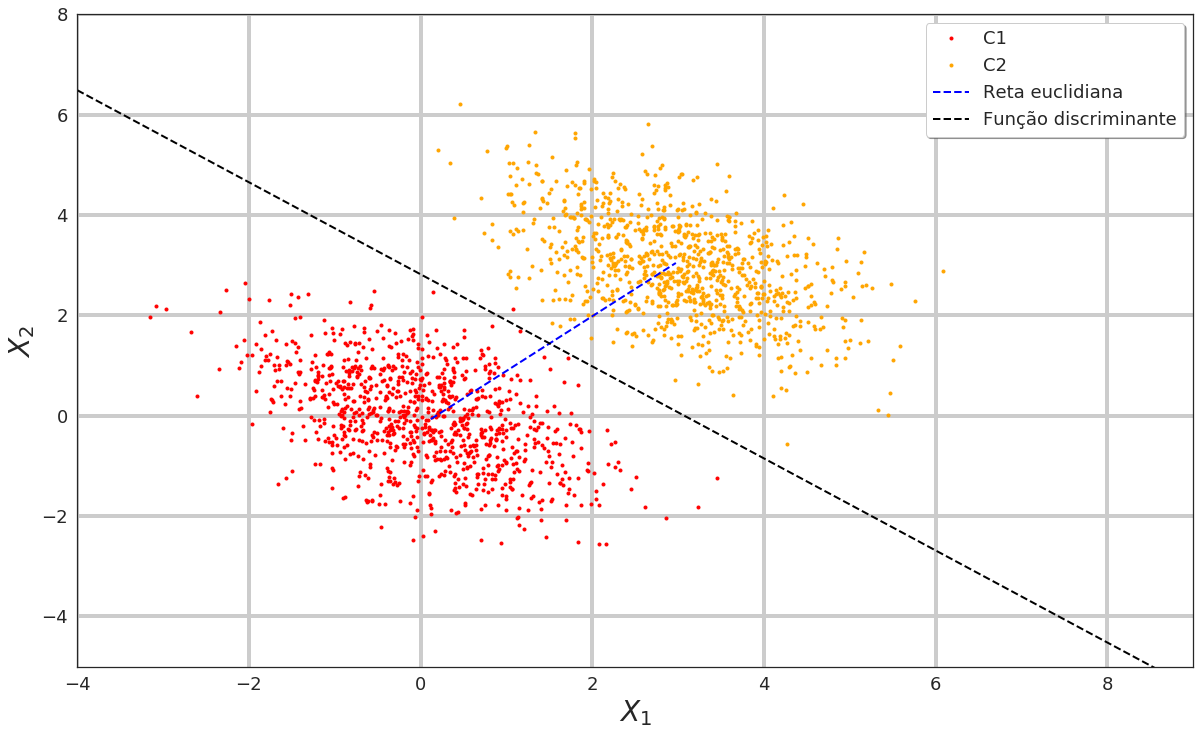

In [ ]:
plt.figure(figsize = [20, 12])
plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'C2' )
plt.plot(x_vet,y,'--',color = 'Blue',label ='Reta euclidiana',linewidth=2)
plt.plot(x1,y_perd,'--',color = 'black',label ='Função discriminante',linewidth=2)
plt.ylim(-5,8)
plt.xlim(-4,9)

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.grid(linestyle='-', linewidth=4)
plt.legend(loc='upper right', shadow=True,prop={'size': 18})
plt.xlabel('$X_{1}$',fontsize = 28)
plt.ylabel('$X_{2}$ ',fontsize = 28)

## Erro

In [ ]:
e1 = 100*np.sum(np.array([-a_fd*Teste0[0] + Teste0[1]]) > b_fd)/[1000]  # erro estimado da classe 1
e2 = 100*np.sum(np.array([-a_fd*Teste1[0] + Teste1[1]]) < b_fd)/[1000]  # erro estimado da classe 2

(e1 + e2)/2

array([0.05])

**9.3:**

Como mostrado na questão 3 e fazendo as devidas substituições, o erro teórico pode ser calculado a partir de:

$$e_{1} = \int_{-\infty }^{\infty}{\int_{-\infty}^{-x_{2}+3}{\frac{1}{\sqrt{2\pi}}e^{\frac{-(x_{1}^{2}+x_{2}^{2})}{2}} dx_{1}dx_{2}}}$$

$$e_{2} = \int_{-\infty }^{\infty}{\int_{-x{2}+3}^{\infty}{\frac{1}{\sqrt{2\pi}}e^{\frac{-(x_{1}-3)^{2}-(x_{2}-3)^{2}}{2}} dx_{1}dx_{2}}}$$

Para classes equiprováveis, a probabilidade de erro pode ser calculada a partir da média dos erros em cada classe. Desse modo:

$$P_{e} = \frac{e_{1}+e_{2}}{2}$$

# Estimando as pdf para os dados de treinamento do conjunto C1 e C2

In [ ]:
kde_x1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(Trein0[0].reshape(-1, 1)) 
kde_y1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(Trein0[1].reshape(-1, 1))
kde_x2 = KernelDensity(kernel='gaussian', bandwidth=1).fit(Trein1[0].reshape(-1, 1))
kde_y2 = KernelDensity(kernel='gaussian', bandwidth=1).fit(Trein1[1].reshape(-1, 1))

In [ ]:
x_init  = np.min([Trein0[0],Trein1[0]])
x_final = np.max([Trein0[0],Trein1[0]])

y_init  = np.min([Trein0[1],Trein1[1]])
y_final = np.max([Trein0[1],Trein1[1]])

x_grid = np.linspace(x_init,x_final,500)
y_grid = np.linspace(y_init,y_final,500)

In [ ]:
ind  = []
out  = []
for j in y_grid:
  for i in x_grid:
    output = np.abs((np.exp(kde_x1.score(np.array([[i]])) 
                     + kde_y1.score(np.array([[j]])))) 
                     - (np.exp(kde_x2.score(np.array([[i]]))
                     +  kde_y2.score(np.array([[j]])))))
    out.append(output)
  ind.append(np.argmin(out))
  out = []

Text(0, 0.5, '$X_{2}$')

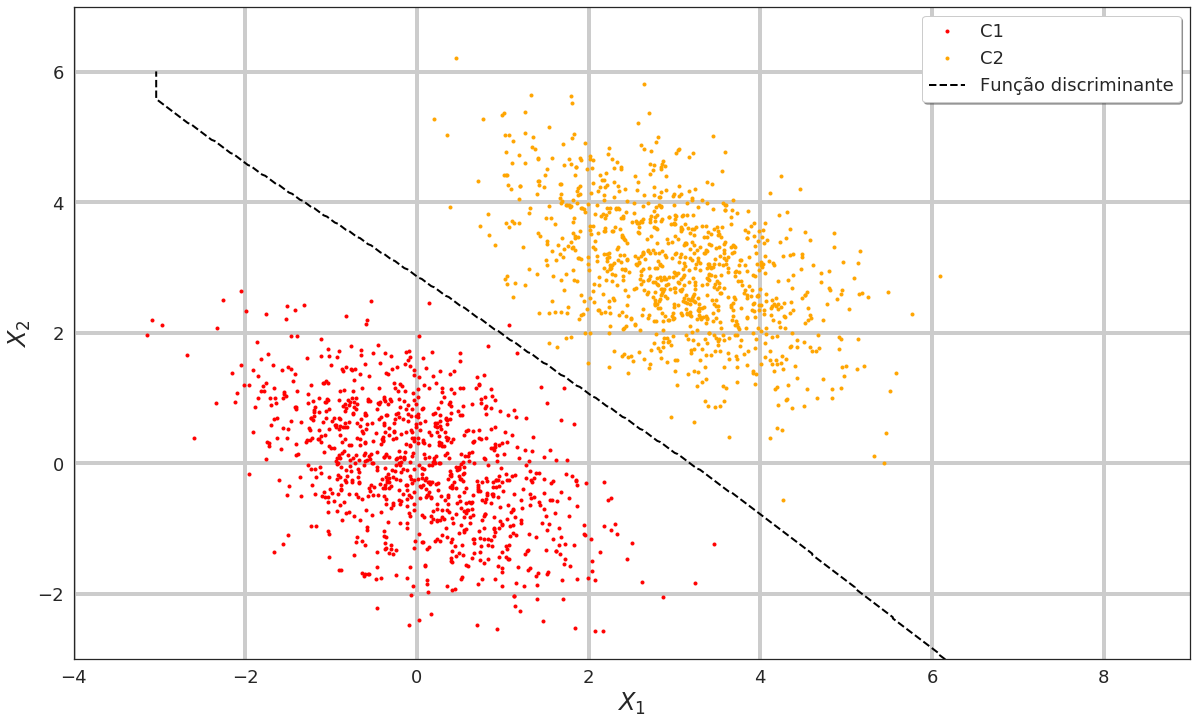

In [ ]:
plt.figure(figsize = [20, 12])

plt.plot(Teste0[0],Teste0[1], '.',color ='Red',label = 'C1' )
plt.plot(Teste1[0],Teste1[1],'.',color = 'orange',label = 'C2' )
plt.plot(x_grid[ind],y_grid,'--',color = 'black',label ='Função discriminante',linewidth=2)
plt.ylim(-3,7)
plt.xlim(-4,9)
plt.legend(loc='upper right', shadow=True,prop={'size': 18})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.grid(linestyle='-', linewidth=4)
plt.xlabel('$X_{1}$',fontsize = 24)
plt.ylabel('$X_{2}$',fontsize = 24)


In [ ]:
def erro_bayes_ing(Teste,x_grid,y_grid,ind,flag):
  cont_erro = []
  if flag ==1: # erro da classe 1
    for i in range(1000):
      x_comp =np.where(Teste0[0][i] > x_grid[ind])[0]
      y_comp =np.where(Teste0[1][i] > y_grid)[0]
      a = np.intersect1d(x_comp,y_comp)
      a = np.sum(a)
      if a > 1:
       a = 1
      cont_erro.append(a)


  else : # erro da classe 2
      for i in range(1000):
        x_comp =np.where(Teste[0][i] < x_grid[ind])[0]
        y_comp =np.where(Teste[1][i] < y_grid)[0]
        a = np.intersect1d(x_comp,y_comp)
        a = np.sum(a)
        if a > 1:
          a = 1
        cont_erro.append(a)
  e  = (np.sum(cont_erro)/1000)*100

  return e

In [ ]:
e1 = erro_bayes_ing(Teste0,x_grid,y_grid,ind,flag =1) # estimando o erro da classe C1
e2 = erro_bayes_ing(Teste1,x_grid,y_grid,ind,flag =0) # estimando o erro da classe C2
erro = (e1 + e2)/2

erro

0.05

**9.4:**

A probabilidade de erro de cada classe, assim como a probabilidade de erro teórica para os conjuntos de dados gerados anteriomente é:

In [ ]:
def k_visinhos_menores(x_ref,x,y_ref,y,k):
  D      = dist_euclidiana(x_ref,x,y_ref,y) # Calculado a distancia entre as amostras
  D      = D[0][D[0]>0]
  Comp_D = np.sort(D)
  Comp_D = Comp_D[0:k]  # pegando K visinhos menores      
  return Comp_D

In [ ]:
def class_amostra(x_ref,y_ref,Trein0,Trein1,k):
 
  x          = Trein0[0]    # banco de dados 1
  y          = Trein0[1]    # banco de dados 1
  
  Comp_D0    = k_visinhos_menores(x_ref,x,y_ref,y,k) #K visinhos do banco de dados 1

  x          = Trein1[0]    # banco de dados 2
  y          = Trein1[1]    # banco de dados 2

  Comp_D1    = k_visinhos_menores(x_ref,x,y_ref,y,k) #K visinhos do banco de dados 2

  Comp_D      = np.concatenate([Comp_D0, Comp_D1])
  Comp        = np.argsort(Comp_D)[0:k]

  if np.sum(Comp < k) >= np.fix(k/2) + 1:
    Amostra = 1

  else: 
    Amostra = 0
  return Amostra

In [ ]:
def f_disc_KNN(Trein0,Trein1,k,step):

  x_aux = [np.min([Trein0[0],Trein1[0]]),np.max([Trein1[0],Trein1[0]])]
  y_aux = [np.min([Trein0[1],Trein1[1]]),np.max([Trein1[1],Trein1[1]])]

  x_vetor = np.linspace(x_aux[0],x_aux[1],step)
  y_vetor = np.linspace(y_aux[0],y_aux[1],step)
  mins = []; # vetor que armazena os minimos
  points = []; # vetor que armazena os indices dos minimos
  for i in y_vetor:
    for j in x_vetor:
      x_ref = j
      y_ref = i
      x          = Trein0[0]    # banco de dados 1
      y          = Trein0[1]    # banco de dados 1 
      Comp_D0    = k_visinhos_menores(x_ref,x,y_ref,y,k) #K visinhos do banco de dados 1

      x          = Trein1[0]    # banco de dados 2
      y          = Trein1[1]    # banco de dados 2
      Comp_D1    = k_visinhos_menores(x_ref,x,y_ref,y,k) #K visinhos do banco de dados 2


      mins.append(abs(sum(Comp_D0)- sum(Comp_D1))); # subtraç
    points.append(np.argmin(mins)); # pega o valor mais proximo de zero para cada
    mins = []
  
  x_vetor= x_vetor[points]

  return x_vetor, y_vetor

In [ ]:
def dist_euclidiana(x_ref,x,y_ref,y):
  p0 = x_ref
  p1 = x

  q0 = y_ref
  q1 = y

  D = np.sqrt([np.array([p1 -p0])**2 + np.array([q1 -q0])**2])

  return D



## k = 1

In [ ]:
k = 1 
step = 50
x_vetor,y_vetor  = f_disc_KNN(Trein0,Trein1,k,step)

In [ ]:
Classe_knn = np.zeros((2,1000))

for i in range(1000):
  x_ref = Trein0[0][i]
  y_ref = Trein0[1][i]

  Classe_knn[0][i] = class_amostra(x_ref,y_ref,Teste0,Teste1,k)

  x_ref = Trein1[0][i]
  y_ref = Trein1[1][i]

  Classe_knn[1][i] =class_amostra(x_ref,y_ref,Teste0,Teste1,k)

e1 = np.sum(Classe_knn[0] == 0)/1000
e2 = np.sum(Classe_knn[1] == 1)/1000

((e1 + e2)/2)*100


0.05

Text(0, 0.5, '$X_{2}$')

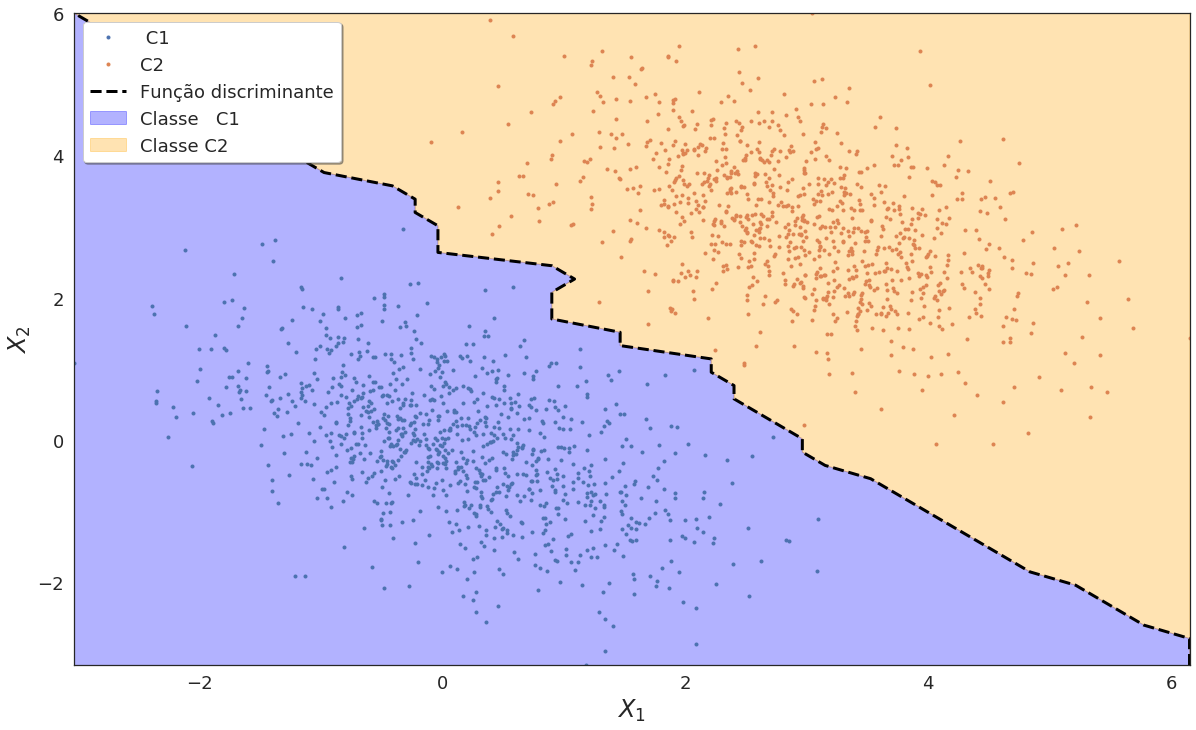

In [ ]:
#sns.set(style = 'white')
plt.figure(figsize = (20,12))
plt.fill_between(x_vetor,-5,y_vetor,alpha = 0.3,color = 'blue', label = 'Classe   C1')
plt.fill_between(x_vetor,y_vetor,9,alpha = 0.3,color = 'orange', label = 'Classe C2')
plt.plot(Trein0[0],Trein0[1],'.',label =' C1')
plt.plot(Trein1[0],Trein1[1],'.',label ='C2')
plt.plot(x_vetor,y_vetor,'--',color ='black',linewidth=3,label ='Função discriminante')
plt.ylim(np.min(y_vetor),np.max(y_vetor))
plt.xlim(np.min(x_vetor),np.max(x_vetor))
plt.legend(loc='upper left', shadow=True,prop={'size': 18})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.xlabel('$X_{1}$',fontsize = 24)
plt.ylabel('$X_{2}$',fontsize = 24)



# k =5

In [ ]:
k = 5 
step = 50
x_vetor,y_vetor  = f_disc_KNN(Trein0,Trein1,k,step)

In [ ]:
Classe_knn = np.zeros((2,1000))

for i in range(1000):
  x_ref = Trein0[0][i]
  y_ref = Trein0[1][i]

  Classe_knn[0][i] = class_amostra(x_ref,y_ref,Teste0,Teste1,k)

  x_ref = Trein1[0][i]
  y_ref = Trein1[1][i]

  Classe_knn[1][i] =class_amostra(x_ref,y_ref,Teste0,Teste1,k)

e1 = 100*np.sum(Classe_knn[0] == 0)/1000
e2 = 100*np.sum(Classe_knn[1] == 1)/1000

erro = (e1 + e2)/2
erro


0.0

Text(0, 0.5, '$X_{2}$')

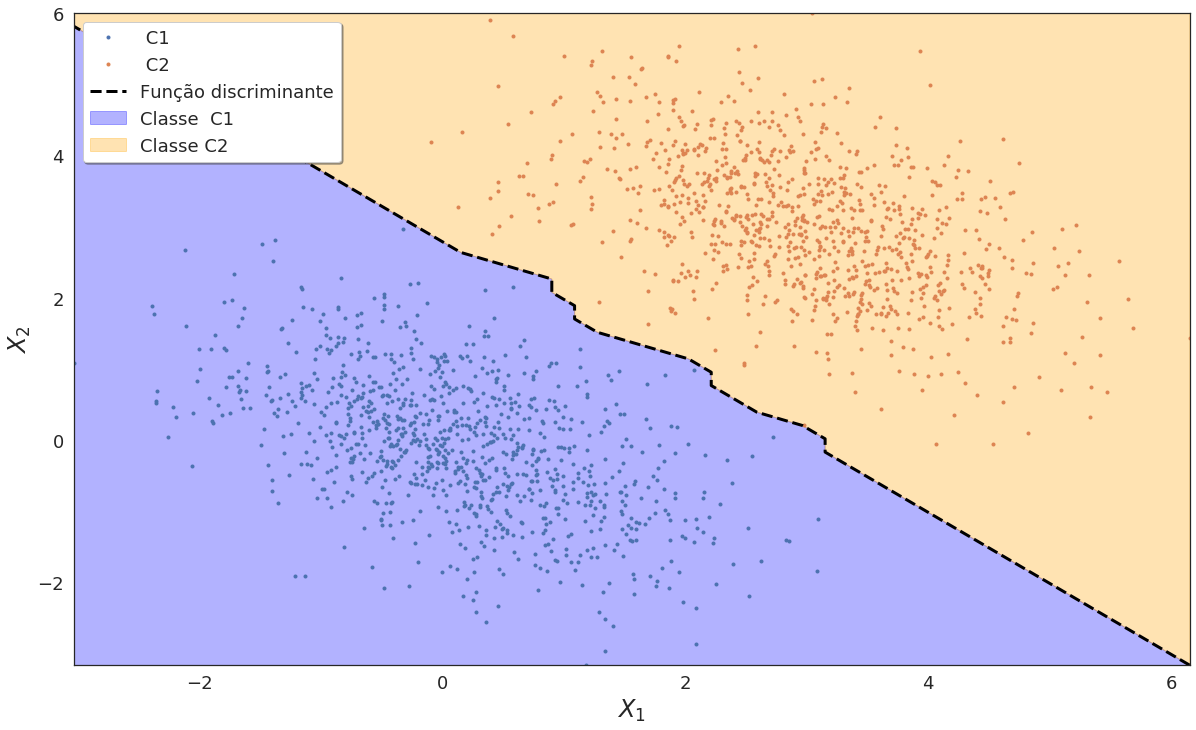

In [ ]:

plt.figure(figsize = (20,12))
plt.fill_between(x_vetor,-5,y_vetor,alpha = 0.3,color = 'blue', label = 'Classe  C1')
plt.fill_between(x_vetor,y_vetor,9,alpha = 0.3,color = 'orange', label = 'Classe C2')
plt.plot(Trein0[0],Trein0[1],'.',label =' C1')
plt.plot(Trein1[0],Trein1[1],'.',label =' C2')
plt.plot(x_vetor,y_vetor,'--',color ='black',linewidth=3,label ='Função discriminante')
plt.ylim(np.min(y_vetor),np.max(y_vetor))
plt.xlim(np.min(x_vetor),np.max(x_vetor))
plt.legend(loc='upper left', shadow=True,prop={'size': 18})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.xlabel('$X_{1}$',fontsize = 24)
plt.ylabel('$X_{2}$',fontsize = 24)


## k = 11

In [ ]:
k = 11
step = 50
x_vetor,y_vetor  = f_disc_KNN(Trein0,Trein1,k,step)

In [ ]:
Classe_knn = np.zeros((2,1000))

for i in range(1000):
  x_ref = Trein0[0][i]
  y_ref = Trein0[1][i]

  Classe_knn[0][i] = class_amostra(x_ref,y_ref,Teste0,Teste1,k)

  x_ref = Trein1[0][i]
  y_ref = Trein1[1][i]

  Classe_knn[1][i] =class_amostra(x_ref,y_ref,Teste0,Teste1,k)

e1 = 100*np.sum(Classe_knn[0] == 0)/1000
e2 = 100*np.sum(Classe_knn[1] == 1)/1000

erro = (e1 + e2)/2
erro




0.25

Text(0, 0.5, '$X_{2}$')

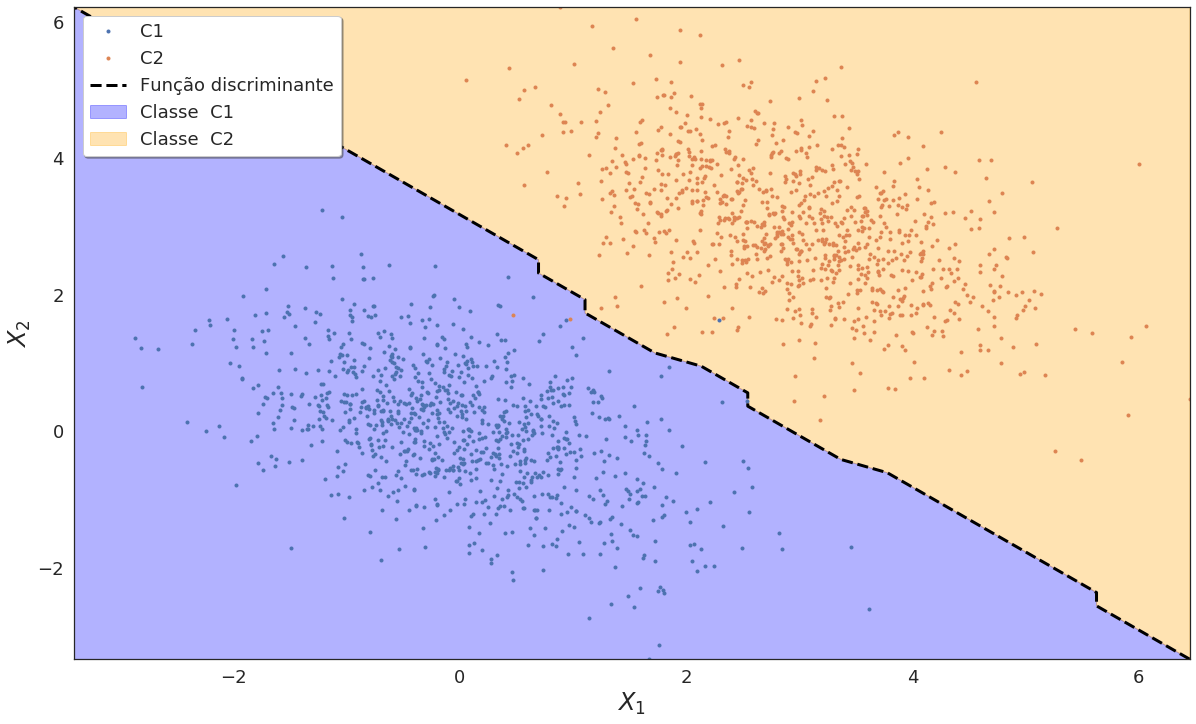

In [ ]:
plt.figure(figsize = (20,12))

plt.fill_between(x_vetor,-5,y_vetor,alpha = 0.3,color = 'blue', label = 'Classe  C1')
plt.fill_between(x_vetor,y_vetor,9,alpha = 0.3,color = 'orange', label = 'Classe  C2')
plt.plot(Trein0[0],Trein0[1],'.',label ='C1')
plt.plot(Trein1[0],Trein1[1],'.',label ='C2')
plt.plot(x_vetor,y_vetor,'--',color ='black',linewidth=3,label ='Função discriminante')
plt.ylim(np.min(y_vetor),np.max(y_vetor))
plt.xlim(np.min(x_vetor),np.max(x_vetor))
plt.legend(loc='upper left', shadow=True,prop={'size': 18})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.xlabel('$X_{1}$',fontsize = 24)
plt.ylabel('$X_{2}$',fontsize = 24)


